In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.special import logsumexp
import copy
import math
import random

In [127]:
def load_data(filepath):
    df = pd.read_csv(filepath)
    
    X = df.drop('Class', axis=1).values
    y = df['Class'].values
    
    unique_classes = np.unique(y)
    class_map = {label: idx for idx, label in enumerate(unique_classes)}
    y = np.array([class_map[label] for label in y])

    return X, y

filepath = 'Pumpkin_Seeds_Dataset.csv'

X, y = load_data(filepath)

print("Shape of X: ",X.shape, "Shape of y: ",y.shape)

Shape of X:  (2500, 12) Shape of y:  (2500,)


In [128]:
def random_feature_selection(X):
    np.random.seed(71)
    r = np.random.randint(8, 13)
    X_new = X[:, :r]

    return X_new

X = random_feature_selection(X)
print("Shape of X: ", X.shape, "Shape of y: ", y.shape)

Shape of X:  (2500, 11) Shape of y:  (2500,)


In [129]:
def train_test_split(X, y, test_size=0.25, random_state=None):
    if random_state is not None:
        np.random.seed(random_state)
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)

    split_index = int(X.shape[0] * (1 - test_size))

    train_indices = indices[:split_index]
    test_indices = indices[split_index:]

    X_train = X[train_indices]
    X_test = X[test_indices]
    y_train = y[train_indices]
    y_test = y[test_indices]

    return X_train, X_test, y_train, y_test

def min_max_scaler(X, feature_range=(0, 1)):
    X_min = np.min(X, axis=0)
    X_max = np.max(X, axis=0)

    X_scaled = (X-X_min)/(X_max-X_min)

    return X_scaled

X = min_max_scaler(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print("Shape of X_train: ",X_train.shape, "Shape of y_train: ",y_train.shape)
print("Shape of X_test: ",X_test.shape, "Shape of y_test: ",y_test.shape)

Shape of X_train:  (1875, 11) Shape of y_train:  (1875,)
Shape of X_test:  (625, 11) Shape of y_test:  (625,)


In [130]:
def sigmoid(z):
    z = z.astype(float)
    g = 1 / (1 + np.exp(-z))
    
    return g


In [131]:
def loss_function(X, y, w, b):
    m, n = X.shape

    z = np.dot(X, w) + b
    y_pred = sigmoid(z)
    
    cost = - (y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
    
    total_cost = np.sum(cost) / m
    
    return total_cost


In [132]:
def compute_gradient_logistic_regression(X, y, w, b):
    m, n = X.shape
    z = np.dot(X, w) + b
    y_pred = sigmoid(z)
    dL_db = np.sum(y_pred - y) / m
    dL_dw = np.dot(X.T, (y_pred - y)) / m
    return dL_db, dL_dw


In [133]:
def batch_gradient_descent_logistic_regression(X, y, w_in, b_in, alpha, num_iters, printFlag = False):
    w = np.copy(w_in)
    b = b_in

    loss_hist = []

    for i in range(num_iters):
        dL_db, dL_dw = compute_gradient_logistic_regression(X, y, w, b)

        w -= alpha * dL_dw
        b -= alpha * dL_db

        loss = loss_function(X, y, w, b)
        loss_hist.append(loss)

        if printFlag and i % 100 == 0:
            print(f"Iteration {i}: Loss = {loss}")

    return w, b, loss_hist


In [134]:
random_seed = 71
random.seed(random_seed)
np.random.seed(random_seed)

def initialize_parameters(num_features):
    initial_w = np.random.normal(0, 1, num_features)
    initial_b = np.random.normal(0, 1)
    alpha = random.uniform(0.01, 0.09)
    return initial_w, initial_b, alpha


In [135]:
num_features = X_train.shape[1]
initial_w, initial_b, alpha = initialize_parameters(num_features)
num_iterations = 1000

w, b, loss_hist = batch_gradient_descent_logistic_regression(X_train, y_train, initial_w, initial_b, alpha, num_iterations, True)

print("Optimized parameter values w:", w)
print("Optimized parameter value b:", b)

Iteration 0: Loss = 0.7474725983480304
Iteration 100: Loss = 0.6807320129330692


Iteration 200: Loss = 0.6451225966787664
Iteration 300: Loss = 0.6150371891324535
Iteration 400: Loss = 0.5895061932581874
Iteration 500: Loss = 0.5677155496232856
Iteration 600: Loss = 0.5489944820970061
Iteration 700: Loss = 0.5327986370093635
Iteration 800: Loss = 0.5186896030859068
Iteration 900: Loss = 0.5063151075099972
Optimized parameter values w: [-0.13512646 -0.48585181  0.6739125  -0.44162182 -0.1682412   0.84331902
  1.70991658 -1.25211161 -0.49966957 -2.35523088  0.97048908]
Optimized parameter value b: 0.9514887122860507


In [136]:
def predict(X, w, b):
    m, n = X.shape
    p = np.zeros(m)
    z = np.dot(X, w) + b
    f_x = sigmoid(z)
    p = (f_x >= 0.5).astype(int)

    return p

In [137]:
p_train = predict(X_train, w,b)
print('Train Accuracy: %f'%(np.mean(p_train == y_train) * 100))
p_test = predict(X_test, w,b)
print('Test Accuracy: %f'%(np.mean(p_test == y_test) * 100))

Train Accuracy: 84.266667
Test Accuracy: 84.960000


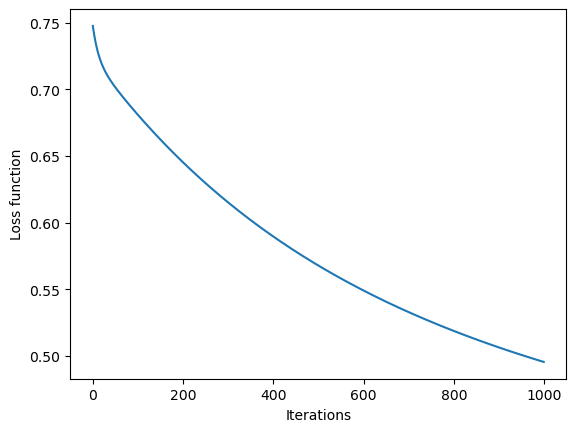

In [138]:
loss_plot = [loss_hist[i] for i in range(len(loss_hist))]
plt.xlabel("Iterations")
plt.ylabel("Loss function")
plt.plot(loss_plot)
plt.show()


Performance with Manual Hyperparameters:
Train Accuracy: 84.16%
Test Accuracy: 86.08%

Performance with Random Hyperparameters:
Train Accuracy: 84.27%
Test Accuracy: 84.96%

Train Accuracy Improvement: 0.13% (Random performed better)
Test Accuracy Improvement: 1.32% (Manual performed better)


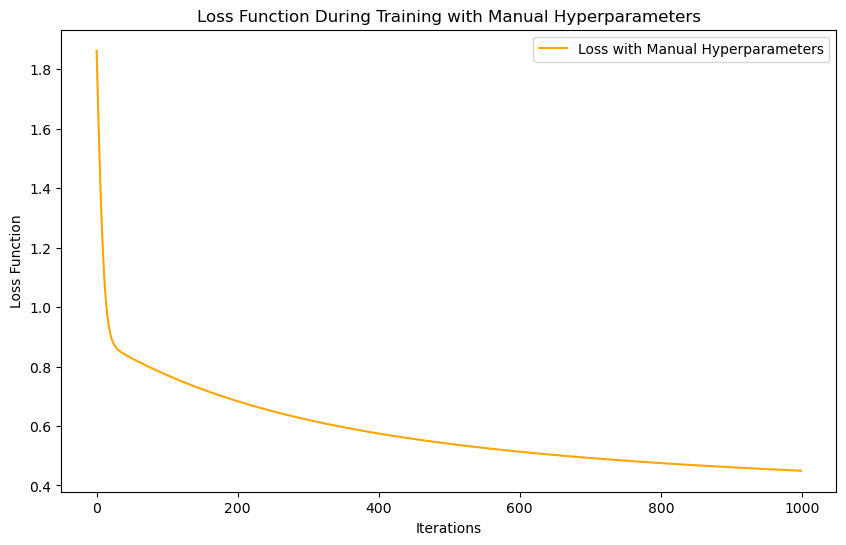

In [139]:
no_of_features = 10
alpha = 0.1
num_iterations = 1000

X = X[:, :no_of_features]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Training the model with manually chosen hyperparameters
initial_w = np.random.normal(0, 1, no_of_features)
initial_b = np.random.normal(0, 1)

w, b, loss_hist = batch_gradient_descent_logistic_regression(X_train, y_train, initial_w, initial_b, alpha, num_iterations)

# Calculate and print the accuracy with manually chosen hyperparameters
p_train_manual = predict(X_train, w, b)
p_test_manual = predict(X_test, w, b)
train_accuracy_manual = np.mean(p_train_manual == y_train) * 100
test_accuracy_manual = np.mean(p_test_manual == y_test) * 100

print("\nPerformance with Manual Hyperparameters:")
print(f"Train Accuracy: {train_accuracy_manual:.2f}%")
print(f"Test Accuracy: {test_accuracy_manual:.2f}%")

train_accuracy_random = np.mean(p_train == y_train) * 100
test_accuracy_random = np.mean(p_test == y_test) * 100

print("\nPerformance with Random Hyperparameters:")
print(f"Train Accuracy: {train_accuracy_random:.2f}%")
print(f"Test Accuracy: {test_accuracy_random:.2f}%")

# Calculate percentage improvement for training accuracy
train_accuracy_improvement = ((train_accuracy_manual - train_accuracy_random) / train_accuracy_random) * 100

# Calculate percentage improvement for testing accuracy
test_accuracy_improvement = ((test_accuracy_manual - test_accuracy_random) / test_accuracy_random) * 100

# Determine which performed better for training accuracy
train_perf = "Manual" if train_accuracy_improvement > 0 else "Random"
print(f"\nTrain Accuracy Improvement: {abs(train_accuracy_improvement):.2f}% ({train_perf} performed better)")

# Determine which performed better for testing accuracy
test_perf = "Manual" if test_accuracy_improvement > 0 else "Random"
print(f"Test Accuracy Improvement: {abs(test_accuracy_improvement):.2f}% ({test_perf} performed better)")

# Plotting the loss history with manually chosen hyperparameters
plt.figure(figsize=(10, 6))
plt.plot(loss_hist, label='Loss with Manual Hyperparameters', color='orange')
plt.xlabel("Iterations")
plt.ylabel("Loss Function")
plt.title("Loss Function During Training with Manual Hyperparameters")
plt.legend()
plt.show()